In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Preprocessing
from dojo.preprocessing import LabelEncoder
from dojo.tree import RegressionTree

# Metrics
from dojo import metrics

### Load the dataset

In [2]:
fires = pd.read_csv("./fires.csv")
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 7 columns):
temp           517 non-null float64
RH             517 non-null float64
wind           517 non-null float64
rain           517 non-null float64
area           517 non-null float64
log(area+1)    517 non-null float64
sin(area)      517 non-null float64
dtypes: float64(7)
memory usage: 28.4 KB


***

# EDA

## Statistical Data

In [3]:
fires.describe()

,temp,RH,wind,rain,area,log(area+1),sin(area)
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663,12.849724,1.113449,0.087751
std,5.806625,16.317469,1.791653,0.295959,63.655327,1.396509,0.520179
min,2.200000,15.000000,0.400000,0.000000,0.000024,0.000024,-0.999749
25%,15.500000,33.000000,2.700000,0.000000,0.005617,0.005601,0.001004
50%,19.300000,42.000000,4.000000,0.000000,0.520000,0.418710,0.006572
75%,22.800000,53.000000,4.900000,0.000000,6.570000,2.024193,0.398609
max,33.300000,100.000000,9.400000,6.400000,1090.840000,6.995620,0.999958


## Correlation

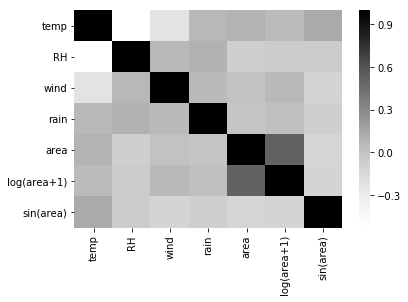

In [4]:
sns.heatmap(fires.corr(), cmap="Greys");

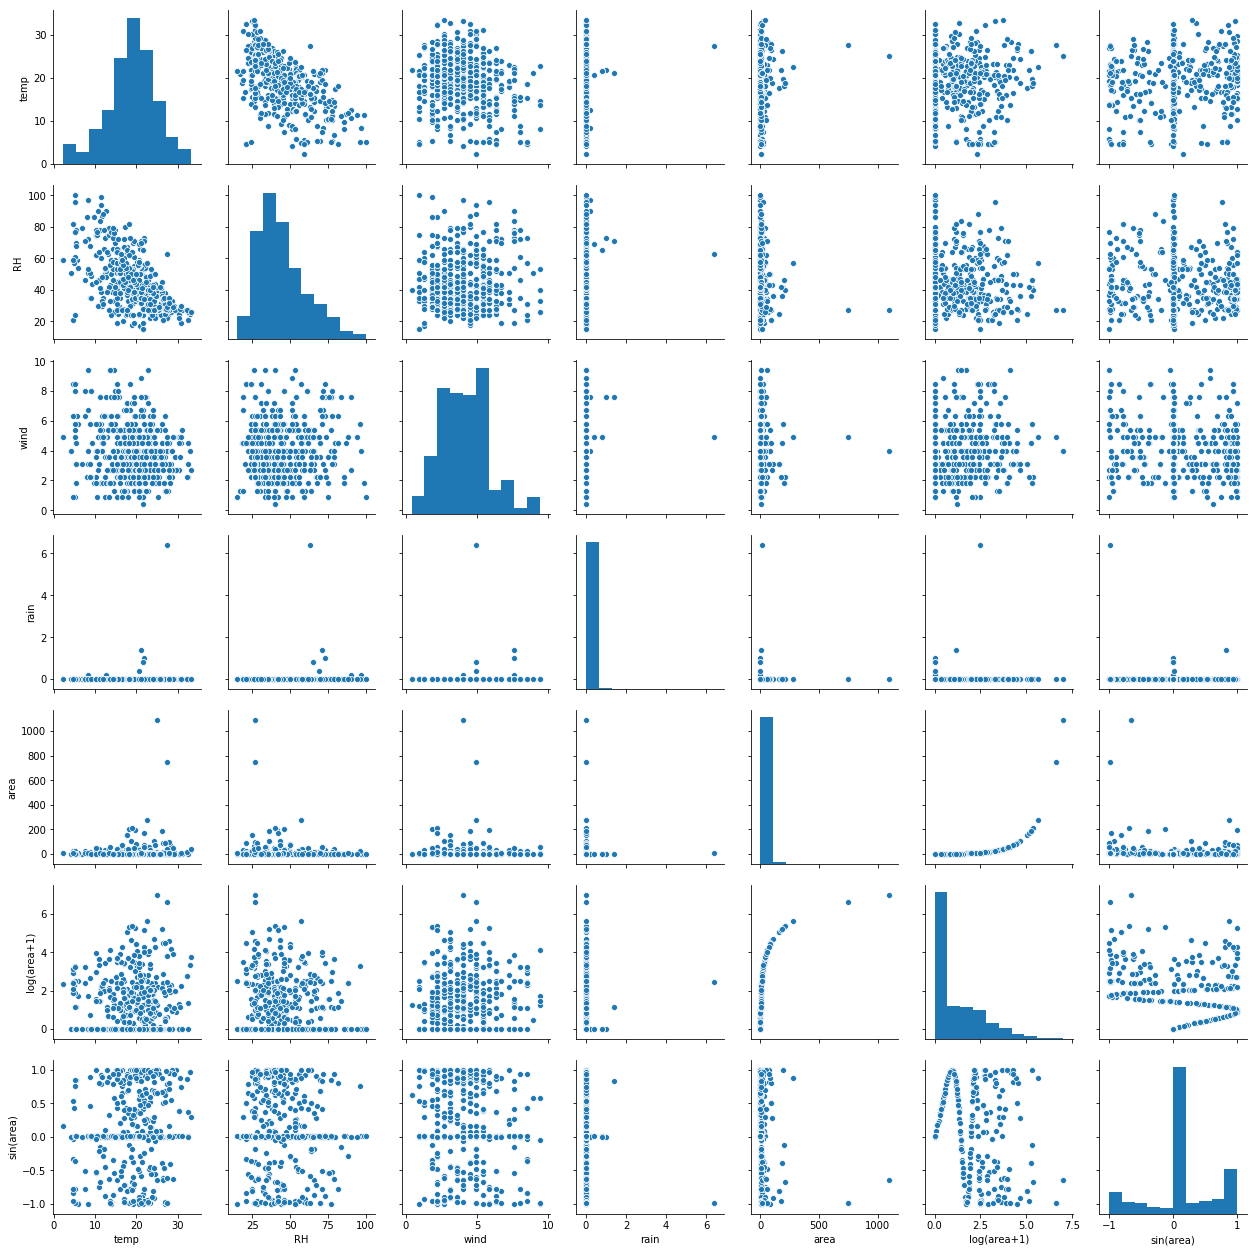

In [5]:
sns.pairplot(fires);

## Distributions

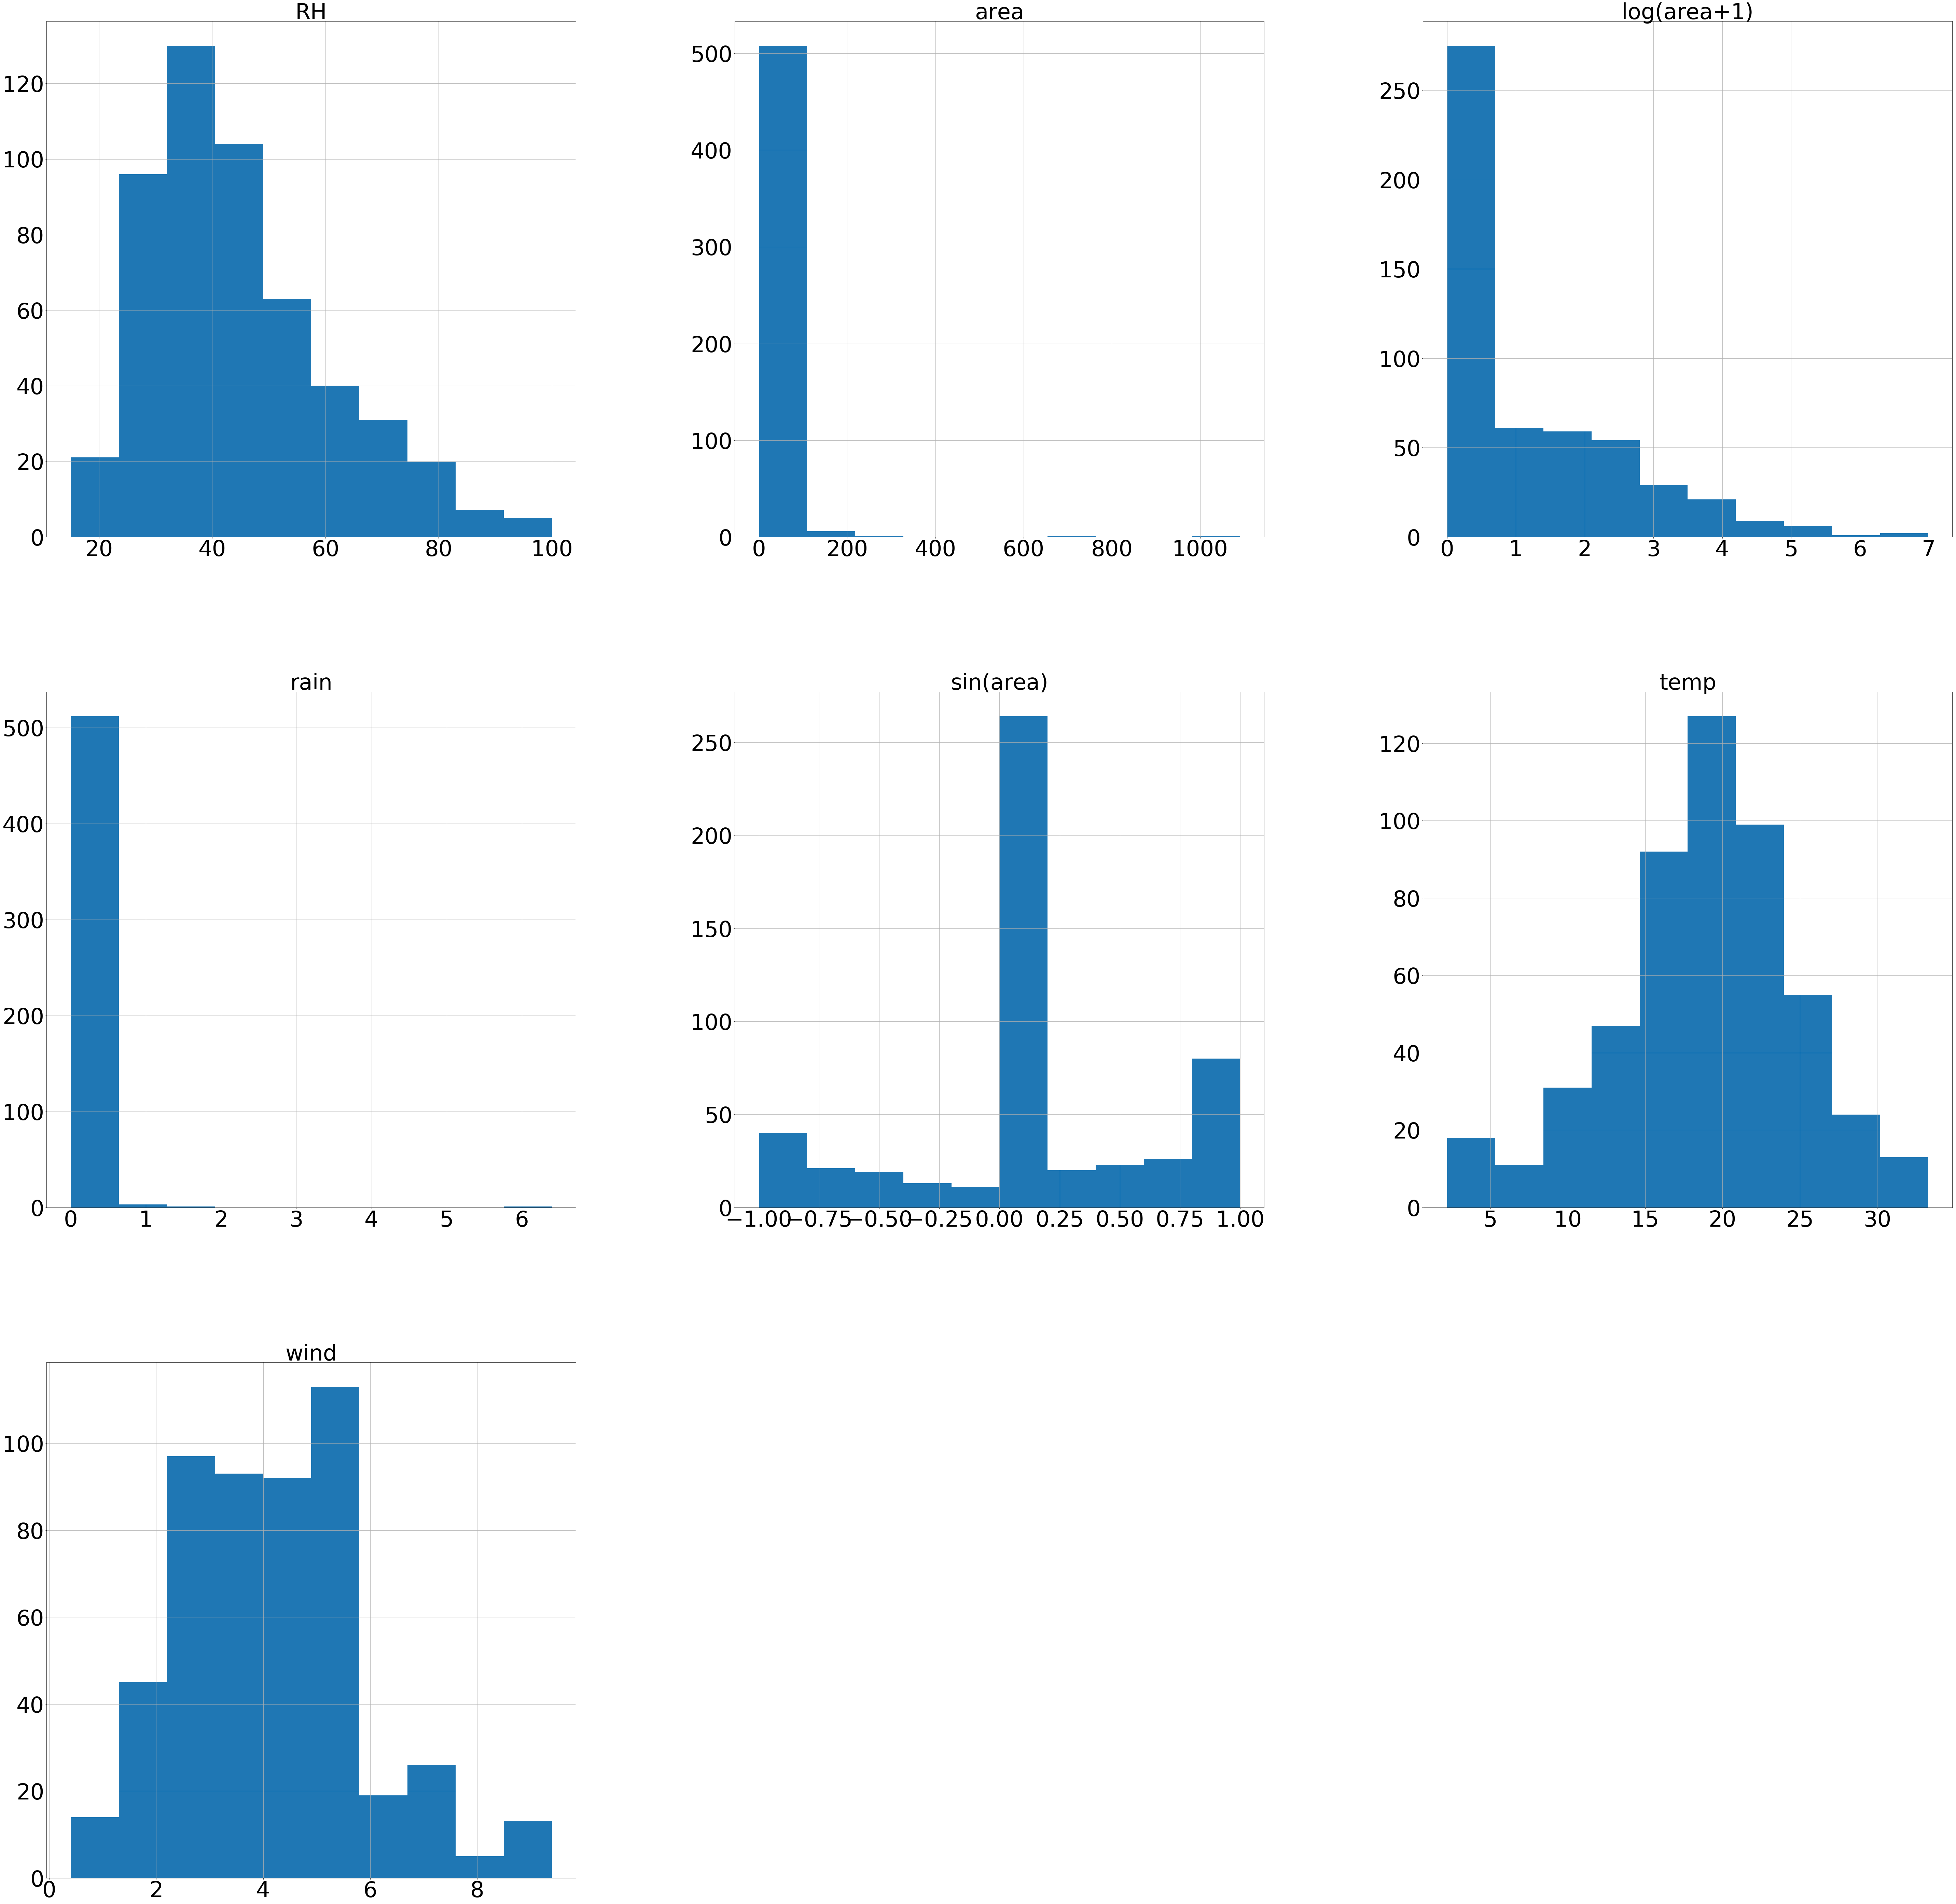

In [6]:
fig = fires.hist(figsize=(100, 100), xlabelsize=64, ylabelsize=64);
[x.title.set_size(64) for x in fig.ravel()];

***

# Preprocessing

## Splitting

In [7]:
X, y_raw, y_log, y_sin = (
    fires.drop(["area", "log(area+1)", "sin(area)"], axis=1),
    fires["area"],
    fires["log(area+1)"],
    fires["sin(area)"],
)

## Feature Selection

### Select Transformed y

In [8]:
y_tf = y_log

### Decision Tree Regressor

In [9]:
tree = RegressionTree().fit(X, y_tf)

In [10]:
# sns.barplot(X.columns, tree.feature_importances_)
# plt.axhline(0.1, c='r');

***

## Evaluating Dummy models

In [11]:
dummy_y = y_tf

### 1. Dummy model (predicting always 0.00)

In [12]:
print("NEG_RMSE:", -np.sqrt(metrics.mean_squared_error(dummy_y, np.zeros_like(dummy_y))))
print("NEG_MAE:", -metrics.mean_absolute_error(dummy_y, np.zeros_like(dummy_y)))

NEG_RMSE: -1.7850028154917024
NEG_MAE: -1.1134494081386341


### 2. Dummy model (predicting always 1.00)

In [13]:
print("NEG_RMSE:", -np.sqrt(metrics.mean_squared_error(dummy_y, np.ones_like(dummy_y))))
print("NEG_MAE:", -metrics.mean_absolute_error(dummy_y, np.ones_like(dummy_y)))

NEG_RMSE: -1.3997629210105678
NEG_MAE: -0.11344940813863401


### 3. Dummy model (predicting always the mean of `y`)

In [14]:
y_pred = np.array([np.mean(dummy_y) for _ in range(dummy_y.size)])

print("NEG_RMSE:", -np.sqrt(metrics.mean_squared_error(dummy_y, y_pred)))
print("NEG_MAE:", -metrics.mean_absolute_error(dummy_y, y_pred))

NEG_RMSE: -1.3951578644830953
NEG_MAE: 6.871786612766927e-17
